<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Curva-Chave" data-toc-modified-id="Curva-Chave-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Curva Chave</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected=True)

/home/breno/.virtualenvs/dtsci/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192

/home/breno/.virtualenvs/dtsci/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192



# Curva Chave

$$ Q = A \cdot (h - h_o)^B $$

In [23]:
df_ = pd.read_csv('curva chave - ResumoDescarga_C_34060000.csv', header = 10)[['Data',
       'Cota', 'Vazao']]
df_['Data'] = pd.to_datetime(df_['Data'])

df = df_[df_['Data'].dt.year >= 1988 ]

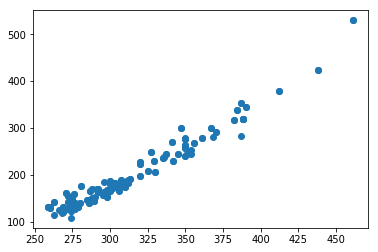

In [28]:
plt.scatter(df['Cota'],df['Vazao']);

In [56]:
func = lambda a, b, x: a*(x)**b

popt, pcov = curve_fit(func, df['Cota'], df['Vazao'], p0 = [3e-3,2])

/home/breno/.virtualenvs/dtsci/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in double_scalars



In [57]:
popt

array([1.28929679e-02, 2.33297090e-14])

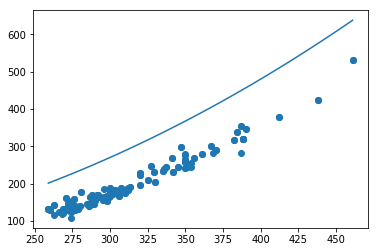

In [61]:
xx = np.linspace(df['Cota'].min(), df['Cota'].max())

plt.scatter(df['Cota'], df['Vazao'])
plt.plot(xx, func(3e-3,2,x = xx ))